# The Sparks Foundation - Data Science and Business Analytics Internship


## Task no. 1 - Prediction using supervised Machine Learning


Problem Statement - Predict the percentage of an student based on the no. of study hours.

Objective - What should be the predicted score if student studies for 9.5 hours/day?

By - Hrishikesh Kambli

# 1. Importing the Data

In this step, we will import all the required libraries and required dataset

In [ ]:
#Importing all required important libraries -
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt  

In [ ]:
#Importing the data from remote
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("Data imported successfully")

Data imported successfully


In [ ]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.shape

(25, 2)

In [ ]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# 2. Data Visualization

In this step, we visualize the given dataset and try to see if their any direct corelation exist between the two variables or not.

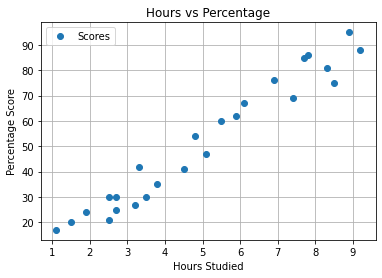

In [ ]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

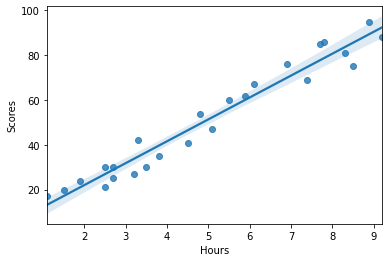

In [ ]:
sns.regplot(x = "Hours", y = "Scores", data = df)

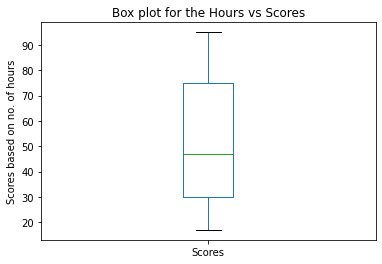

In [ ]:
df_scores = df['Scores']
df_scores.plot(kind='box', figsize=(6, 4))
plt.title('Box plot for the Hours vs Scores')
plt.ylabel('Scores based on no. of hours')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


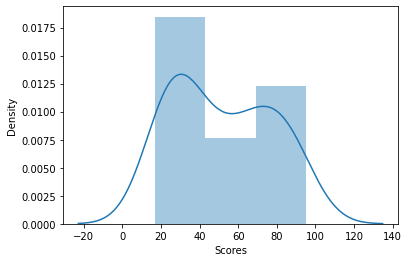

In [ ]:
sns.distplot(df['Scores'])

##3. Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [ ]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [ ]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

The next step is to split this data into training and test sets. This can be done by using Scikit-Learn's built-in train_test_split() method:



In [ ]:
#Split the dataset into train and test data within 70:30 Ratio
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Training the Model

We have split our data into training and testing sets, and now is finally the time to train our algorithm

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print("Training complete.")

Training complete.


In [ ]:
regressor.coef_,regressor.intercept_

(array([9.78856669]), 2.3708153823418883)

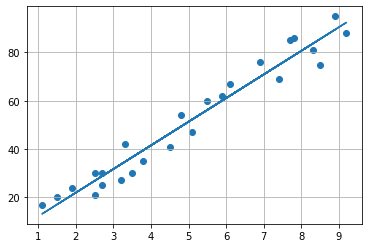

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.grid()
plt.show()

#5. Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [ ]:
y_pred = regressor.predict(X_test) # Predicting the scores
d_accuracy = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
d_accuracy 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [ ]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("the predicted score if student studies for", hours, "hours/day is", own_pred[0])

the predicted score if student studies for 9.25 hours/day is 92.91505723477056


# 6. Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error and mean Absolute error.

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
r_sq = regressor.fit(X_train, y_train).score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9529426789332803


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Squared Error: 22.965097212700428
Root Mean Squared Error: 4.7921912746363144
Mean Absolute Error: 4.419727808027651
